In [2]:
#使用的python版本与运行环境
import sys
print("系统环境为: ",sys.version)
print("系统运行为: ",sys.executable)
#使用的部分包
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import matplotlib.gridspec as gridspec

from sklearn import decomposition
from sklearn.feature_selection import f_classif
from sklearn.mixture import GaussianMixture

#使用的包的版本
print("numpy的版本为：",np.__version__)
print("pandas的版本为：",pd.__version__)
print("sklearn的版本为:",sklearn.__version__)
print("matplotlib的版本为：",matplotlib.__version__)

系统环境为:  3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
系统运行为:  D:\applications\anaconda\python.exe
numpy的版本为： 1.21.5
pandas的版本为： 1.4.2
sklearn的版本为: 1.0.2
matplotlib的版本为： 3.5.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   

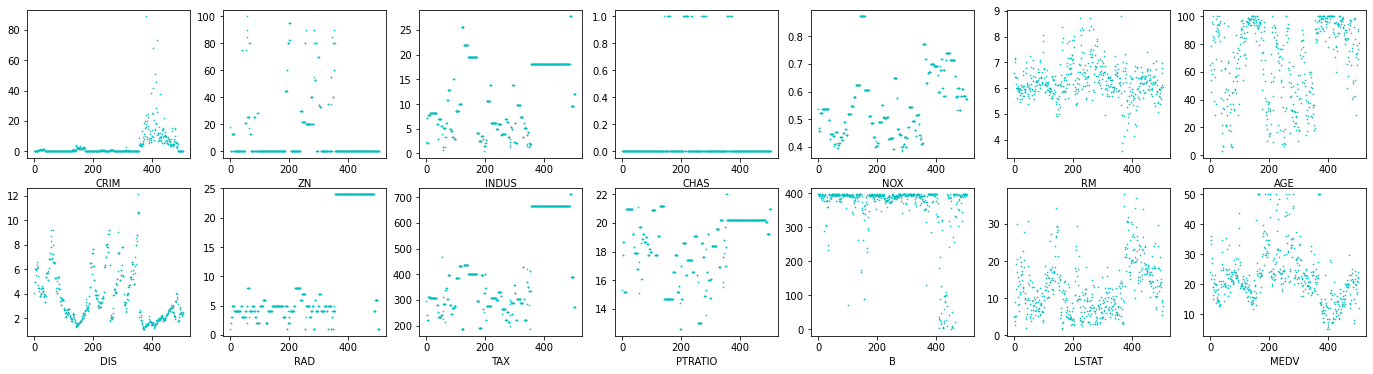

In [22]:
data=pd.read_csv("D:/work/20221122/boston_house.csv")
# 数据来源阿里云天池：https://tianchi.aliyun.com/dataset/138924

# 缺失值统计  无缺失值
# 各变量类型
print(data.info())

# 部分数据展示
print(data.head(3))

# 描述统计部分
print(data.describe())
# 可视化各变量数据散点图
# import matplotlib.gridspec as gridspec
# 创建一个图形
fig = plt.figure(figsize=(24, 6))

# 创建一个 3x5 的网格布局
gs = gridspec.GridSpec(2, 7)
# 在网格布局中放置 14 个子图

for i, col in enumerate(data.columns):
    ax = fig.add_subplot(gs[i])
    ax.scatter(data.index, data[col],color='c',s=0.4)
    plt.xlabel(col)

fig.savefig('D:/Latex_Project/CodingBasis_Project/Figures/var_plot.jpg')

该数据集包含美国人口普查局收集的美国马萨诸塞州波士顿住房价格的有关信息, 数据集很小，只有506个案例。

数据集都有以下14个属性:

CRIM–城镇人均犯罪率 ------【城镇人均犯罪率】  
ZN - 占地面积超过25,000平方英尺的住宅用地比例。 ------【住宅用地所占比例】  
INDUS - 每个城镇非零售业务的比例。 ------【城镇中非商业用地占比例】  
CHAS - Charles River虚拟变量（如果是河道，则为1;否则为0 ------【查尔斯河虚拟变量，用于回归分析】  
NOX - 一氧化氮浓度（每千万份） ------【环保指标】  
RM - 每间住宅的平均房间数 ------【每栋住宅房间数】  
AGE - 1940年以前建造的自住单位比例 ------【1940年以前建造的自住单位比例 】  
DIS -波士顿的五个就业中心加权距离 ------【与波士顿的五个就业中心加权距离】   
RAD - 径向高速公路的可达性指数 ------【距离高速公路的便利指数】  
TAX - 每10,000美元的全额物业税率 ------【每一万美元的不动产税率】  
PTRATIO - 城镇的学生与教师比例 ------【城镇中教师学生比例】  
B - 1000（Bk - 0.63）^ 2其中Bk是城镇黑人的比例 ------【城镇中黑人比例】  
LSTAT - 人口状况下降％ ------【房东属于低等收入阶层比例】  
MEDV - 自有住房的中位数报价, 单位1000美元 ------【自住房屋房价中位数】  

主成分提取两个主成分

[0.46757068 0.11782371 0.09635042 0.06332428 0.06077853 0.04714363
 0.03824363 0.02879118 0.01980454 0.01801839 0.0151993  0.01307054
 0.00957212 0.00430905]
[[ 0.24 -0.25  0.33 -0.01  0.33 -0.2   0.3  -0.3   0.3   0.32  0.21 -0.2
   0.31 -0.27]
 [-0.07 -0.15  0.13  0.41  0.25  0.43  0.26 -0.36  0.03  0.01 -0.31  0.03
  -0.2   0.44]
 [ 0.4   0.39 -0.07 -0.13 -0.05  0.35 -0.2   0.16  0.42  0.34  0.   -0.36
  -0.16  0.16]]
PCA:  [[ 2.42284451e-01 -2.45435005e-01  3.31859746e-01 -5.02713285e-03
   3.25193880e-01 -2.02816554e-01  2.96976574e-01 -2.98169809e-01
   3.03412754e-01  3.24033052e-01  2.07679535e-01 -1.96638358e-01
   3.11397955e-01 -2.66636396e-01]
 [-6.58731079e-02 -1.48002653e-01  1.27075668e-01  4.10668763e-01
   2.54276363e-01  4.34005810e-01  2.60303205e-01 -3.59149977e-01
   3.11495955e-02  8.85140554e-03 -3.14623061e-01  2.64810325e-02
  -2.01245177e-01  4.44924411e-01]
 [ 3.95077419e-01  3.94545713e-01 -6.60819134e-02 -1.25305293e-01
  -4.64755487e-02  3.53406095e-01 -2.

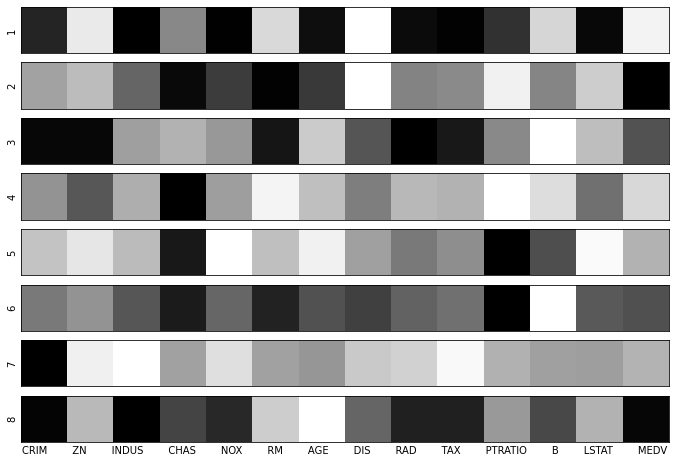

In [24]:
# from sklearn import decomposition
datapca = data.copy()

# 数据标准化, 如果不标准化的话,会被黑人比例和税率两个大数量级的主导
datapca = datapca.apply(lambda x: (x - x.mean()) / x.std())

# 提取前2个主成分
pca = decomposition.PCA(n_components=14, random_state=1)

datapca_transform = pca.fit_transform(datapca)

# 得知道前3个主成分所占比例
print(pca.explained_variance_ratio_[:])

# 输出前 3 个主成分的权重
print(np.around((pca.components_[:3]), decimals=2))

# 查看这些中心点画像,用1*14的图像表示前三个主成分
fig, ax = plt.subplots(8,1, figsize=(16,8))

print("PCA: ",pca.components_[:3])
i=0
for axi, center in zip(ax.flat, pca.components_[:8]):
    axi.set(xticks=[],yticks=[])
    axi.imshow(pca.components_[i:i+1], interpolation='nearest',cmap=plt.cm.binary)
    axi.set_ylabel(i+1)
    if (i+1==8):
        axi.set_xlabel('CRIM        ZN        INDUS        CHAS        NOX        RM        AGE        DIS        RAD        TAX        PTRATIO        B        LSTAT        MEDV')
    i=i+1
fig.savefig('D:/Latex_Project/CodingBasis_Project/Figures/pca.jpg')

In [25]:
# 类的定义的应用
# 设计一个聚类method的basis class、
# 然后kmeans和高斯聚类继承，并分别实现各自功能
# 自己定义kmeans方法

# 聚类基类
class Cluster():
    '''
    聚类基础类的定义，主要包含两接口，fit
    属性有n_clusters
    '''
    def __init__(self, n_clusters=4):
        self.n_clusters = n_clusters
        
    def fit(self, df):
        raise NotImplementedError
        
class Kmeans(Cluster):
    def __init__(self, n_clusters=2, tolerance=0.0001, max_iter=100):
        Cluster.__init__(self, n_clusters)
        self.tolerance = tolerance  # centroids change tolerance
        self.max_iter = max_iter
        self.centers = []  # a list to save all centroids in each iterations
        self.cluster = {}  # a dic to temply save cluster result
        self.RSS = []  # a list to save iterations and RSS
        self.first_category = {}  # to save the initial category_result
        
    def fit(self, data, seed=20230104):  
        # random chose initial point
        np.random.seed(seed)  # set random seed
        initial_points = []  # list to save initial points
        for i in range(self.n_clusters):
            initial_points.append(np.random.randint(len(data)))
        self.centers.append(data[initial_points])

        for itertime in range(self.max_iter):
            for category in range(self.n_clusters):
                self.cluster[category] = []  # key is cluster result, value is the point
            RSSk = []
            for point in data:
                distances = []
                for centroid in range(len(self.centers[itertime])):
                    distances.append(np.sum((point - self.centers[itertime][centroid])**2)) 
                cluster = distances.index(min(distances))  # min distances to set the point category
                self.cluster[cluster].append(point) 
    
                RSSk.append(min(distances)**2)

            # save initial category
            if (itertime==0):
                self.first_category = self.cluster.copy()
            
            # save itertime and RSSk
            self.RSS.append([itertime, sum(RSSk)])
            
            # the next iteration centroids
            self.centers.append([])
            for category in range(self.n_clusters):
                self.centers[itertime+1].append(np.average(self.cluster[category], axis=0))  # reset centers
                           
            break_index = np.zeros(self.n_clusters)
            for i in range(self.n_clusters):
                if (np.sum((self.centers[itertime+1][i] - self.centers[itertime][i])**2) < self.tolerance):
                    break_index[i] = 1
                    
            if (np.sum(break_index) == self.n_clusters):
                print("iteration time is : ", itertime)
                break
    
    def PickClusterN(self,ClusterN,data):
#       input parameter is a positive integer or not
        try:
            a=Kmeans(ClusterN)   
            a.fit(data)
        except Exception as e:
            return False
        
        data=pd.DataFrame(data,columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'])
        data.apply(lambda x:(x-x.mean())/x.std())
#       The total loss RSSk of each cluster number k is calculated to select the optimal clusterN
        K=range(ClusterN)[2:]
        Fvalue=[]
        for k in range(ClusterN)[2:]:
            KM = KMeans(n_clusters=k, init='k-means++',random_state=1,max_iter=5000)
            KM.fit(data)
            tmp=f_classif(data,KM.labels_)
            Fvalue.append(sum(tmp[0]))
            labels=np.unique(KM.labels_)    

        plt.rcParams['figure.figsize']=(8,4)
        plt.plot(K,Fvalue)
        plt.xlabel("ClusterN")
        plt.ylabel("Fvalue")
        plt.show()


iteration time is :  9


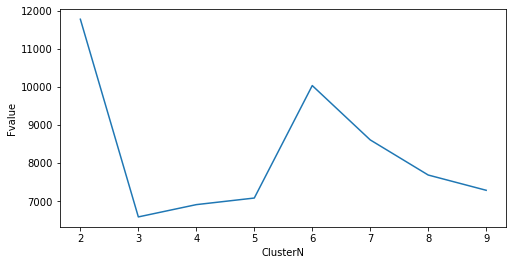

iteration time is :  3
the initial centers are:
 [[3.5000e-01 0.0000e+00 9.9000e+00 0.0000e+00 5.4000e-01 5.9700e+00
  7.6700e+01 3.1000e+00 4.0000e+00 3.0400e+02 1.8400e+01 3.9624e+02
  9.9700e+00 2.0300e+01]
 [4.9000e+00 0.0000e+00 1.8100e+01 0.0000e+00 6.3000e-01 4.9700e+00
  1.0000e+02 1.3300e+00 2.4000e+01 6.6600e+02 2.0200e+01 3.7552e+02
  3.2600e+00 5.0000e+01]
 [2.4000e-01 0.0000e+00 9.6900e+00 0.0000e+00 5.8000e-01 6.0200e+00
  6.5300e+01 2.4100e+00 6.0000e+00 3.9100e+02 1.9200e+01 3.9690e+02
  1.2920e+01 2.1200e+01]]
the final centers are:
 [[2.4000e-01 1.7820e+01 6.6700e+00 7.0000e-02 4.8000e-01 6.4700e+00
  5.5710e+01 4.8700e+00 4.3100e+00 2.7655e+02 1.7870e+01 3.8781e+02
  9.5400e+00 2.5870e+01]
 [1.2300e+01 0.0000e+00 1.8450e+01 6.0000e-02 6.7000e-01 6.0100e+00
  8.9970e+01 2.0500e+00 2.3270e+01 6.6764e+02 2.0200e+01 2.9104e+02
  1.8670e+01 1.6270e+01]
 [7.8000e-01 9.6500e+00 1.3070e+01 7.0000e-02 5.9000e-01 6.1800e+00
  7.3710e+01 3.2900e+00 4.8300e+00 4.0580e+02 1.7640e

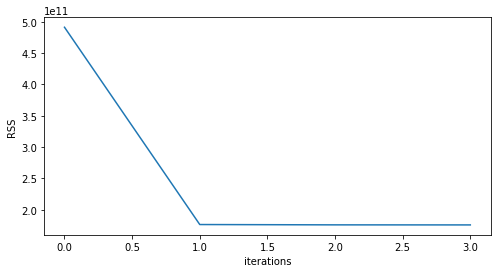

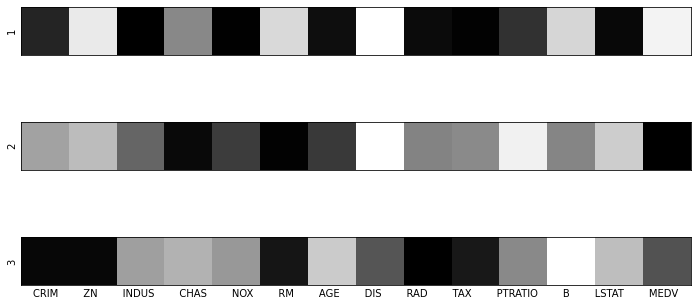

In [26]:
if __name__ == '__main__':
    array = data.values
#     判断聚类个数,尝试0-10
    cluster_result = Kmeans(n_clusters=3, tolerance=0.00000000001, max_iter=100)
    cluster_result.PickClusterN(10,array)
    
#     因此选择聚类3
    cluster_result = Kmeans(n_clusters=3, tolerance=0.00000000001, max_iter=100)
    cluster_result.fit(array)
#     (np.around((pca.components_[:3]), decimals=2))
    print("the initial centers are:\n", np.around(cluster_result.centers[0], decimals=2))
    print("the final centers are:\n", np.around(cluster_result.centers[-1], decimals=2))
    
#     Plot RSSk as a function of the iteration number
    print("Plot RSSk as a function of the iteration number:")
    iterations = []
    RSS = []
    print(cluster_result.RSS)
    for i in range(len(cluster_result.RSS)):
        iterations.append(cluster_result.RSS[i][0])
        RSS.append(cluster_result.RSS[i][1])
    plt.plot(iterations, RSS)
    plt.xlabel("iterations")
    plt.ylabel("RSS")
    plt.show()
    
#     绘制中心点的变量图
# 查看这些中心点画像,用1*14的图像表示聚类中心
    fig, ax = plt.subplots(len(cluster_result.centers[-1]),1, figsize=(12,6))
    i=0
    for axi, center in zip(ax.flat, cluster_result.centers[-1]):
        axi.set(xticks=[],yticks=[])
        axi.imshow(pca.components_[i:i+1], interpolation='nearest',cmap=plt.cm.binary)
        axi.set_ylabel(i+1)
        if (i+1==len(cluster_result.centers[-1])):
            axi.set_xlabel('CRIM        ZN        INDUS        CHAS        NOX        RM        AGE        DIS        RAD        TAX        PTRATIO        B        LSTAT        MEDV')
        i=i+1

用聚类后的数据进行标签,然后将其带入第一第二主成分进行绘图,看每个类的情况

接下来对每个聚出来的类进行分析, 以及聚类中心点的分析, 对各变量的占比情况什么的. 以及每个类的数量多少

In [6]:
# 每个类的数量有多少
for i in range(3):
    print("类",i+1,"的个数有",len(cluster_result.cluster[i]))
#     转为dataframe
    df = pd.DataFrame(cluster_result.cluster[i], columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'])
    print(df.describe())

类 1 的个数有 268
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  268.000000  268.000000  268.000000  268.000000  268.000000  268.000000   
mean     0.241048   17.817164    6.668582    0.074627    0.483398    6.465448   
std      0.321518   26.758529    4.398602    0.263280    0.059580    0.679890   
min      0.006320    0.000000    0.460000    0.000000    0.385000    4.973000   
25%      0.050770    0.000000    3.970000    0.000000    0.434500    5.967500   
50%      0.109930    0.000000    6.060000    0.000000    0.488000    6.342000   
75%      0.300237   25.000000    8.140000    0.000000    0.524000    6.818500   
max      2.635480  100.000000   25.650000    1.000000    0.647000    8.725000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  268.000000  268.000000  268.000000  268.000000  268.000000  268.000000   
mean    55.705224    4.873560    4.313433  276.548507   17.873134  387.814067   
std     26.604

In [40]:
df = pd.DataFrame(cluster_result.cluster[2], columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'])
np.round(df.describe(),2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00
mean,0.78,9.65,13.07,0.07,0.59,6.18,73.71,3.29,4.83,405.80,17.64,363.07,12.75,22.18
std,0.98,23.32,7.14,0.26,0.14,0.60,28.33,2.15,0.84,22.37,2.60,66.25,6.53,7.94
min,0.01,0.00,1.47,0.00,0.40,4.90,6.00,1.32,1.00,352.00,14.70,70.80,1.73,11.80
25%,0.10,0.00,8.56,0.00,0.48,5.86,52.30,1.88,4.00,391.00,14.70,368.24,7.79,17.80
50%,0.23,0.00,12.83,0.00,0.58,6.14,88.00,2.42,5.00,403.00,17.80,389.61,12.27,19.70
75%,1.41,0.00,19.58,0.00,0.62,6.45,96.20,4.09,5.00,430.00,20.90,395.11,15.76,23.80
max,4.10,95.00,21.89,1.00,0.87,8.38,100.00,10.71,6.00,469.00,21.20,396.90,34.41,50.00


类混合高斯聚类

In [42]:
# from sklearn.mixture import GaussianMixture
class Gmm(Cluster):
    def __init__(self, n_clusters):
        Cluster.__init__(self, n_clusters)
        
    def fit(self, data):
        gmm = GaussianMixture(n_components=2, covariance_type='full').fit(data)
        return gmm

In [43]:
df_gmm=data.copy()
gmm = Gmm(2)
gmm_fit = gmm.fit(df_gmm)
labels = gmm_fit.predict(df_gmm)
df_gmm['label']=labels
print(df_gmm[df_gmm['label']==0].shape)
df_gmm[df_gmm['label']==1]

(369, 15)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,label
356,8.98296,0.0,18.10,1,0.770,6.212,97.4,2.1222,24,666,20.2,377.73,17.60,17.8,1
357,3.84970,0.0,18.10,1,0.770,6.395,91.0,2.5052,24,666,20.2,391.34,13.27,21.7,1
358,5.20177,0.0,18.10,1,0.770,6.127,83.4,2.7227,24,666,20.2,395.43,11.48,22.7,1
359,4.26131,0.0,18.10,0,0.770,6.112,81.3,2.5091,24,666,20.2,390.74,12.67,22.6,1
360,4.54192,0.0,18.10,0,0.770,6.398,88.0,2.5182,24,666,20.2,374.56,7.79,25.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711,20.1,395.09,18.06,15.2,1
489,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,344.05,23.97,7.0,1
490,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,318.43,29.68,8.1,1
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6,1


In [44]:
print(df_gmm[df_gmm['label']==0].describe())
print(df_gmm[df_gmm['label']==1].describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  369.000000  369.000000  369.000000  369.000000  369.000000  369.000000   
mean     0.388774   15.582656    8.420894    0.073171    0.511847    6.388005   
std      0.628724   26.086641    6.004356    0.260770    0.101241    0.670817   
min      0.006320    0.000000    0.460000    0.000000    0.385000    4.903000   
25%      0.057890    0.000000    4.000000    0.000000    0.437000    5.933000   
50%      0.131580    0.000000    6.410000    0.000000    0.493000    6.245000   
75%      0.369200   22.000000   10.010000    0.000000    0.544000    6.727000   
max      4.097400  100.000000   25.650000    1.000000    0.871000    8.725000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  369.000000  369.000000  369.000000  369.000000  369.000000  369.000000   
mean    60.632249    4.441272    4.455285  311.926829   17.809214  381.042575   
std     28.217681    2.0979